# Customer churn prediction

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

In this problem, we aim to examine customer data with aim to build and compare customer churn prediction models.

In [483]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [484]:
#Reading the data using pandas library

data = pd.read_csv('customer_churn.csv')

In [485]:
#Display a sample of data

data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3731,2897-DOVND,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,146.65,No
2716,7883-ROJOC,Female,0,Yes,No,19,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.90,839.65,No
137,3774-VBNXY,Female,0,Yes,Yes,64,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,1277.75,No
2896,9522-ZSINC,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.95,253.8,No
5018,6928-ONTRW,Female,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.70,1379.8,No
2801,1017-FBQMM,Female,0,Yes,Yes,62,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),106.05,6703.5,No
4848,5380-AFSSK,Female,0,No,No,5,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,93.90,486.85,Yes
2199,8532-UEFWH,Male,0,Yes,Yes,52,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1345.85,No
1498,0529-ONKER,Male,1,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.65,1146.65,Yes
144,1131-QQZEB,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.95,1756.2,No


In [486]:
pd.set_option('display.max_columns', None)

In [487]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5791,7233-DRTRF,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.40,6444.05,No
4857,6344-SFJVH,Female,0,No,No,20,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),24.90,505.95,No
3233,0928-JMXNP,Male,1,Yes,No,4,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.90,118.25,No
1410,7024-OHCCK,Female,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.85,170.85,Yes
5929,5828-DWPIL,Male,1,Yes,No,62,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,89.10,5618.3,No


# Exploratory data analysis

We will now perform an exploratory data analysis on our dataset to find out sensitive information about the customers.

In [488]:
#Checking information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Observation 

- Our dataset has 19 input columns and one output variable 'Churn'.
- The churn variable has 2 values - Yes and No, which means we have a binary classificarion problem to solve.
- Our dataset has majorly object column, but contain a small number of integer and float columns as well. Apart from this, we also see that Total charges column is of type object, which actually should be float. There is some value in this column which does not match float category.
- The data set has 7043 total rows, and no NaN values.

In [489]:
#Reconfirming null values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Observation -

No null values present in the data set

In [490]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Observation

- The senior citizen column is actually a categorical column with values 0 and 1
- The tenure column has min value of 0 and max value of 72. The data does not seem to be skewed from the available numbers.
- Monthly charges start from 18.25 and end at 118.75.

### Exploring the categorical columns

No     5174
Yes    1869
Name: Churn, dtype: int64

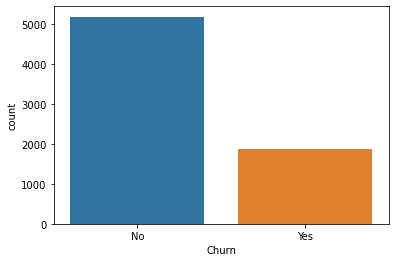

In [491]:
#exloring the churn column

sns.countplot(data.Churn)
data.Churn.value_counts()

### Observation-

- Our data has 5174 value swith churn as No
- 1869 values have churn as yes, which means that these are the customers which we need to focus on for our marketings.

In [492]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [493]:
#Exploring customer ID

data.customerID.unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [494]:
#Checking number of unique values in customer ID column

len(data.customerID.unique())

7043

### Observation - 

The customer ID column has 7043 unique values, and is a unique identification number for all customers.
This column will not allow our model to learn anything hence we will drop this column from the final list of columns that we feed to our model.

In [495]:
#Exploring the gender column

data.gender.unique()

array(['Female', 'Male'], dtype=object)

Male      3555
Female    3488
Name: gender, dtype: int64

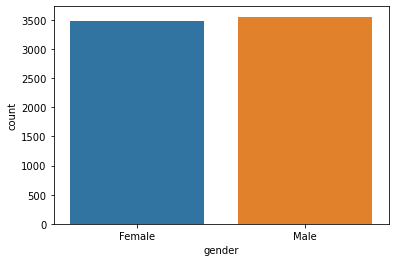

In [496]:
sns.countplot(data.gender)
data.gender.value_counts()

### Observation 

- The number of male members and female members is almost equal.


Male  -    3555

Female -   3488

In [497]:
#Exploring the senior citizen column

data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

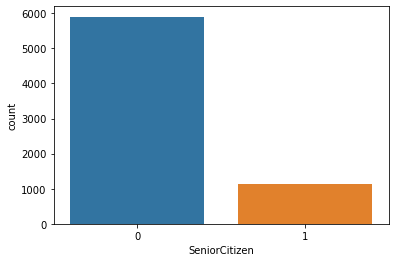

In [498]:
sns.countplot(data.SeniorCitizen)
data.SeniorCitizen.value_counts()

### Observation 

- The column has only 2 types of values - 0 and 1
- Our data has 1142 senior citizens and 5901 non-senior citizens.

In [499]:
#Exploring the Partner column

data.Partner.unique()

array(['Yes', 'No'], dtype=object)

No     3641
Yes    3402
Name: Partner, dtype: int64

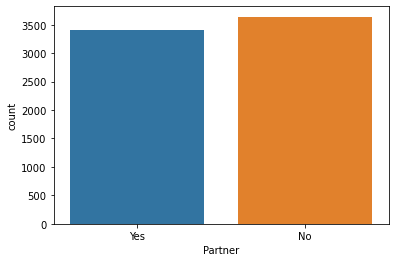

In [500]:
sns.countplot(data.Partner)
data.Partner.value_counts()

### Observation -

The number of people with partner and without partners are almost equal - 

3641 have no partners

3402 have partners

In [501]:
#Exploring the dependents column

data.Dependents.unique()

array(['No', 'Yes'], dtype=object)

No     4933
Yes    2110
Name: Dependents, dtype: int64

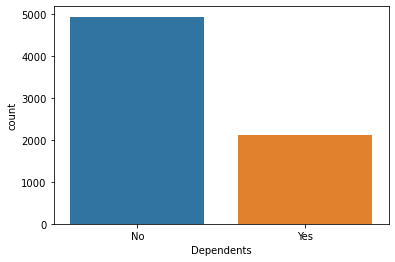

In [502]:
sns.countplot(data.Dependents)
data.Dependents.value_counts()

### Observation -

4833 people have no dependents where as 2110 have dependents on them

In [503]:
#Exploring the phone services column

data.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

Yes    6361
No      682
Name: PhoneService, dtype: int64

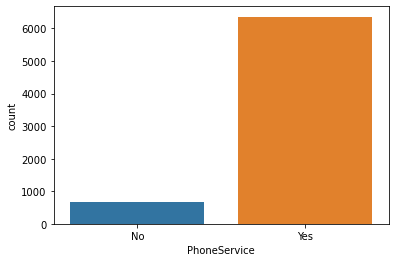

In [504]:
sns.countplot(data.PhoneService)
data.PhoneService.value_counts()

### Observation -

- Phone service column has 2 types of values, yes and no.
- Majority of the people have phone service 6381.

In [505]:
#Exploring the Multiple lines column

data.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

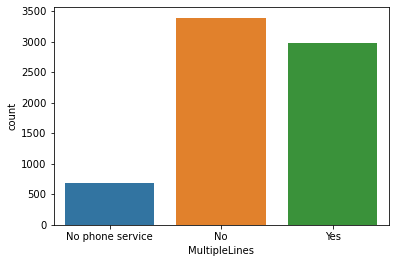

In [506]:
sns.countplot(data.MultipleLines)
data.MultipleLines.value_counts()

### Observation 

- Multiple lines column has 3 types of categories, No yes and No phone service.
- People with Multiple lines as No have the highest number (3390) followed by people with Yes(2971)

In [507]:
#Exploring the internet service column

data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

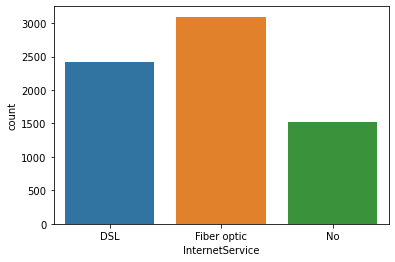

In [508]:
sns.countplot(data.InternetService)
data.InternetService.value_counts()

### Observation 

The Internet service column has 3 values, No, Fiber optic and DSL.

Maximum people have fiber optics connections (3096).
- DSL have 2421 count and No has 1526 count.
The ratio in divisions is not very high.

In [509]:
#Exploring the online backup column

data.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

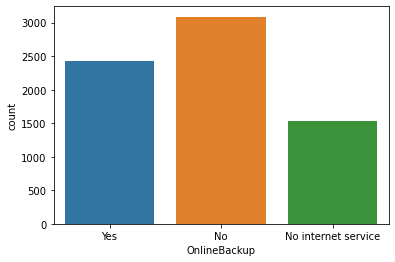

In [510]:
sns.countplot(data.OnlineBackup)
data.OnlineBackup.value_counts()

### Observation 

The online backup column also has 3 types of values - yes, no and no internet service.

- The count of people with this values set as No is the highest (3088) followed by Yes (2429) and last is the no internet service people(1526)

In [511]:
#Exploring the online security column

data.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

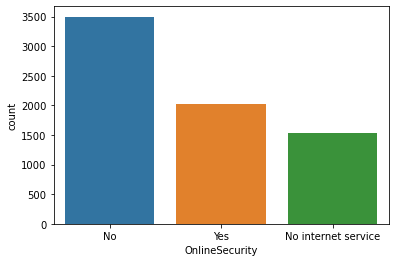

In [512]:
sns.countplot(data.OnlineSecurity)
data.OnlineSecurity.value_counts()

### Observation 

The online security column also has 3 types of values - yes, no and no internet service.

- The count of people with this values set as No is the highest (3498) followed by Yes (2019) and last is the no internet service people(1526)
- The column has almost similar distribution as online backup column

In [513]:
#Exploring the device protection column

data.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

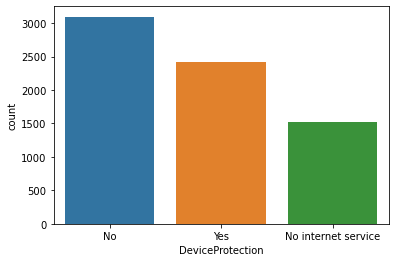

In [514]:
sns.countplot(data.DeviceProtection)
data.DeviceProtection.value_counts()

### Observation 

The device protection column also has 3 types of values - yes, no and no internet service.

- The count of people with this values set as No is the highest (3095) followed by Yes (2422) and last is the no internet service people(1526)
- The column has almost similar distribution as online backup column

In [515]:
#Exploring the tech support column

data.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

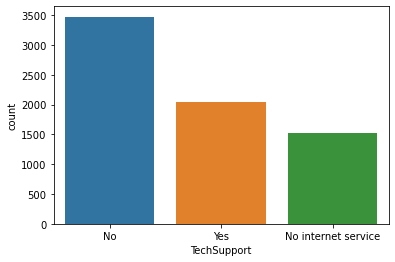

In [516]:
sns.countplot(data.TechSupport)
data.TechSupport.value_counts()

### Observation 

The tech support column also has 3 types of values - yes, no and no internet service.

- The count of people with this values set as No is the highest (3473) followed by Yes (2044) and last is the no internet service people(1526)
- The column has almost similar distribution as online security column

In [517]:
#Exploring the streaming tv column

data.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

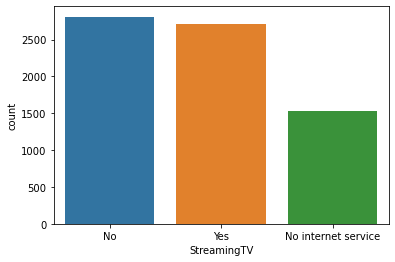

In [518]:
sns.countplot(data.StreamingTV)
data.StreamingTV.value_counts()

### Observation 

The streaming tv column also has 3 types of values - yes, no and no internet service.

- The count of people with this values set as No is the highest (2810) followed by Yes (2707) and last is the no internet service people(1526)
- The column has almost similar distribution for yes and no categories

In [519]:
#Exploring the streaming movies column

data.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

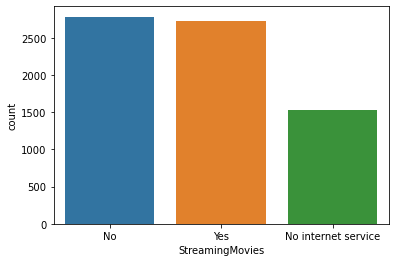

In [520]:
sns.countplot(data.StreamingMovies)
data.StreamingMovies.value_counts()

### Observation 

The streaming movies column also has 3 types of values - yes, no and no internet service.

- The count of people with this values set as No is the highest (2785) followed by Yes (2732) and last is the no internet service people(1526)
- The column has almost similar distribution for yes and no categories

In [521]:
#Exploring the contract column

data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

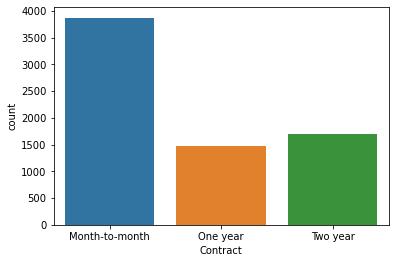

In [522]:
sns.countplot(data.Contract)
data.Contract.value_counts()

### Observation 

The contracts are of 3 types - Month - to month, one year and two year.

Majority of the people have month to month contracts (3875) and one year and two year have almost equal distributions (1695 and 1473 resp)

In [523]:
#Exploring the paperless billing column

data.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

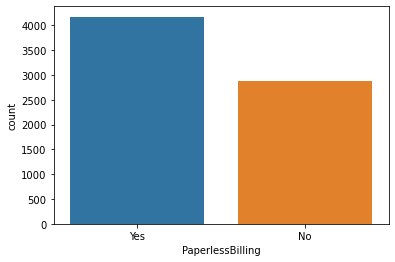

In [524]:
sns.countplot(data.PaperlessBilling)
data.PaperlessBilling.value_counts()

### Observation 

Paper less billing column has 2 categories, yes and no.

People have now shifted to paperless billing and are using digital billing modes, these are greater in number than paper billing people. (4171)

In [525]:
#Exploring the payment method column

data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

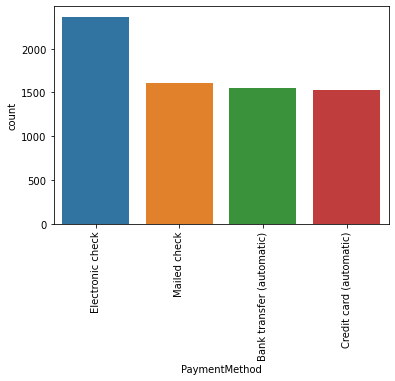

In [526]:
sns.countplot(data.PaymentMethod)
plt.xticks(rotation = 90)
data.PaymentMethod.value_counts()

### Observation 

There are 4 types of payment methods -

- Electronic check
- Mailed check
- Bank transfer
- Credit card

- The highest count of payment method is of Electronic check (2365)
- Rest of the 3 categories have almost similar divisions 

## Exploring the numeric columns



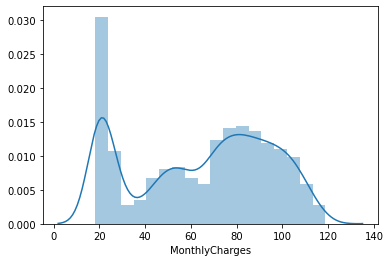

In [527]:
# Exploring monthly charges column

sns.distplot(data.MonthlyCharges)

### Observation 


We observe that the spread of data is in the range 20 - 118.
There is a hike in charges around 20.
- The distribution around 40 - 120 is almost normal.

In [528]:
#Exporing the total charges column. First we will try to find out why the column is of object type

data.TotalCharges.sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [529]:
#We observe that there is data with blank values when we apply sorting on this column. Checking one of the row to confirm this point

In [530]:
data.iloc[936]

customerID            5709-LVOEQ
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                 No
InternetService              DSL
OnlineSecurity               Yes
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                   No
StreamingTV                  Yes
StreamingMovies              Yes
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             80.85
TotalCharges                    
Churn                         No
Name: 936, dtype: object

In [531]:
data['TotalCharges'][936]

' '

In [532]:
#We found that we have ' ' values in the total charges column. Checking the data frame with such values

data[data.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Observation

We observe that we have empty data since tenure is set to 0.

Replacing the total value with monthly charges where the data is not available

In [533]:
data.TotalCharges.replace(' ', data.MonthlyCharges, inplace = True)

In [534]:
data[data.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [535]:
data['TotalCharges'][936]

80.85

In [536]:
data.TotalCharges = data.TotalCharges.astype('float')

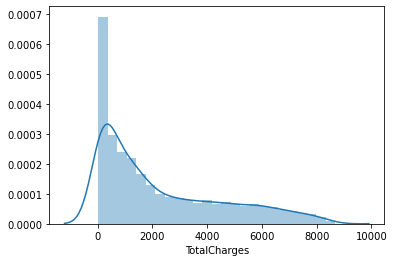

In [537]:
#The data has successfully been replaced. Plotting graph for these values now

sns.distplot(data.TotalCharges)

### Observation

Majority of the people have total charges under 2000.
The data is right skewed.

### Bivariate analysis and multivariate analysis

In [538]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [539]:
# Checking relationships of churn column with multiple factors 

categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

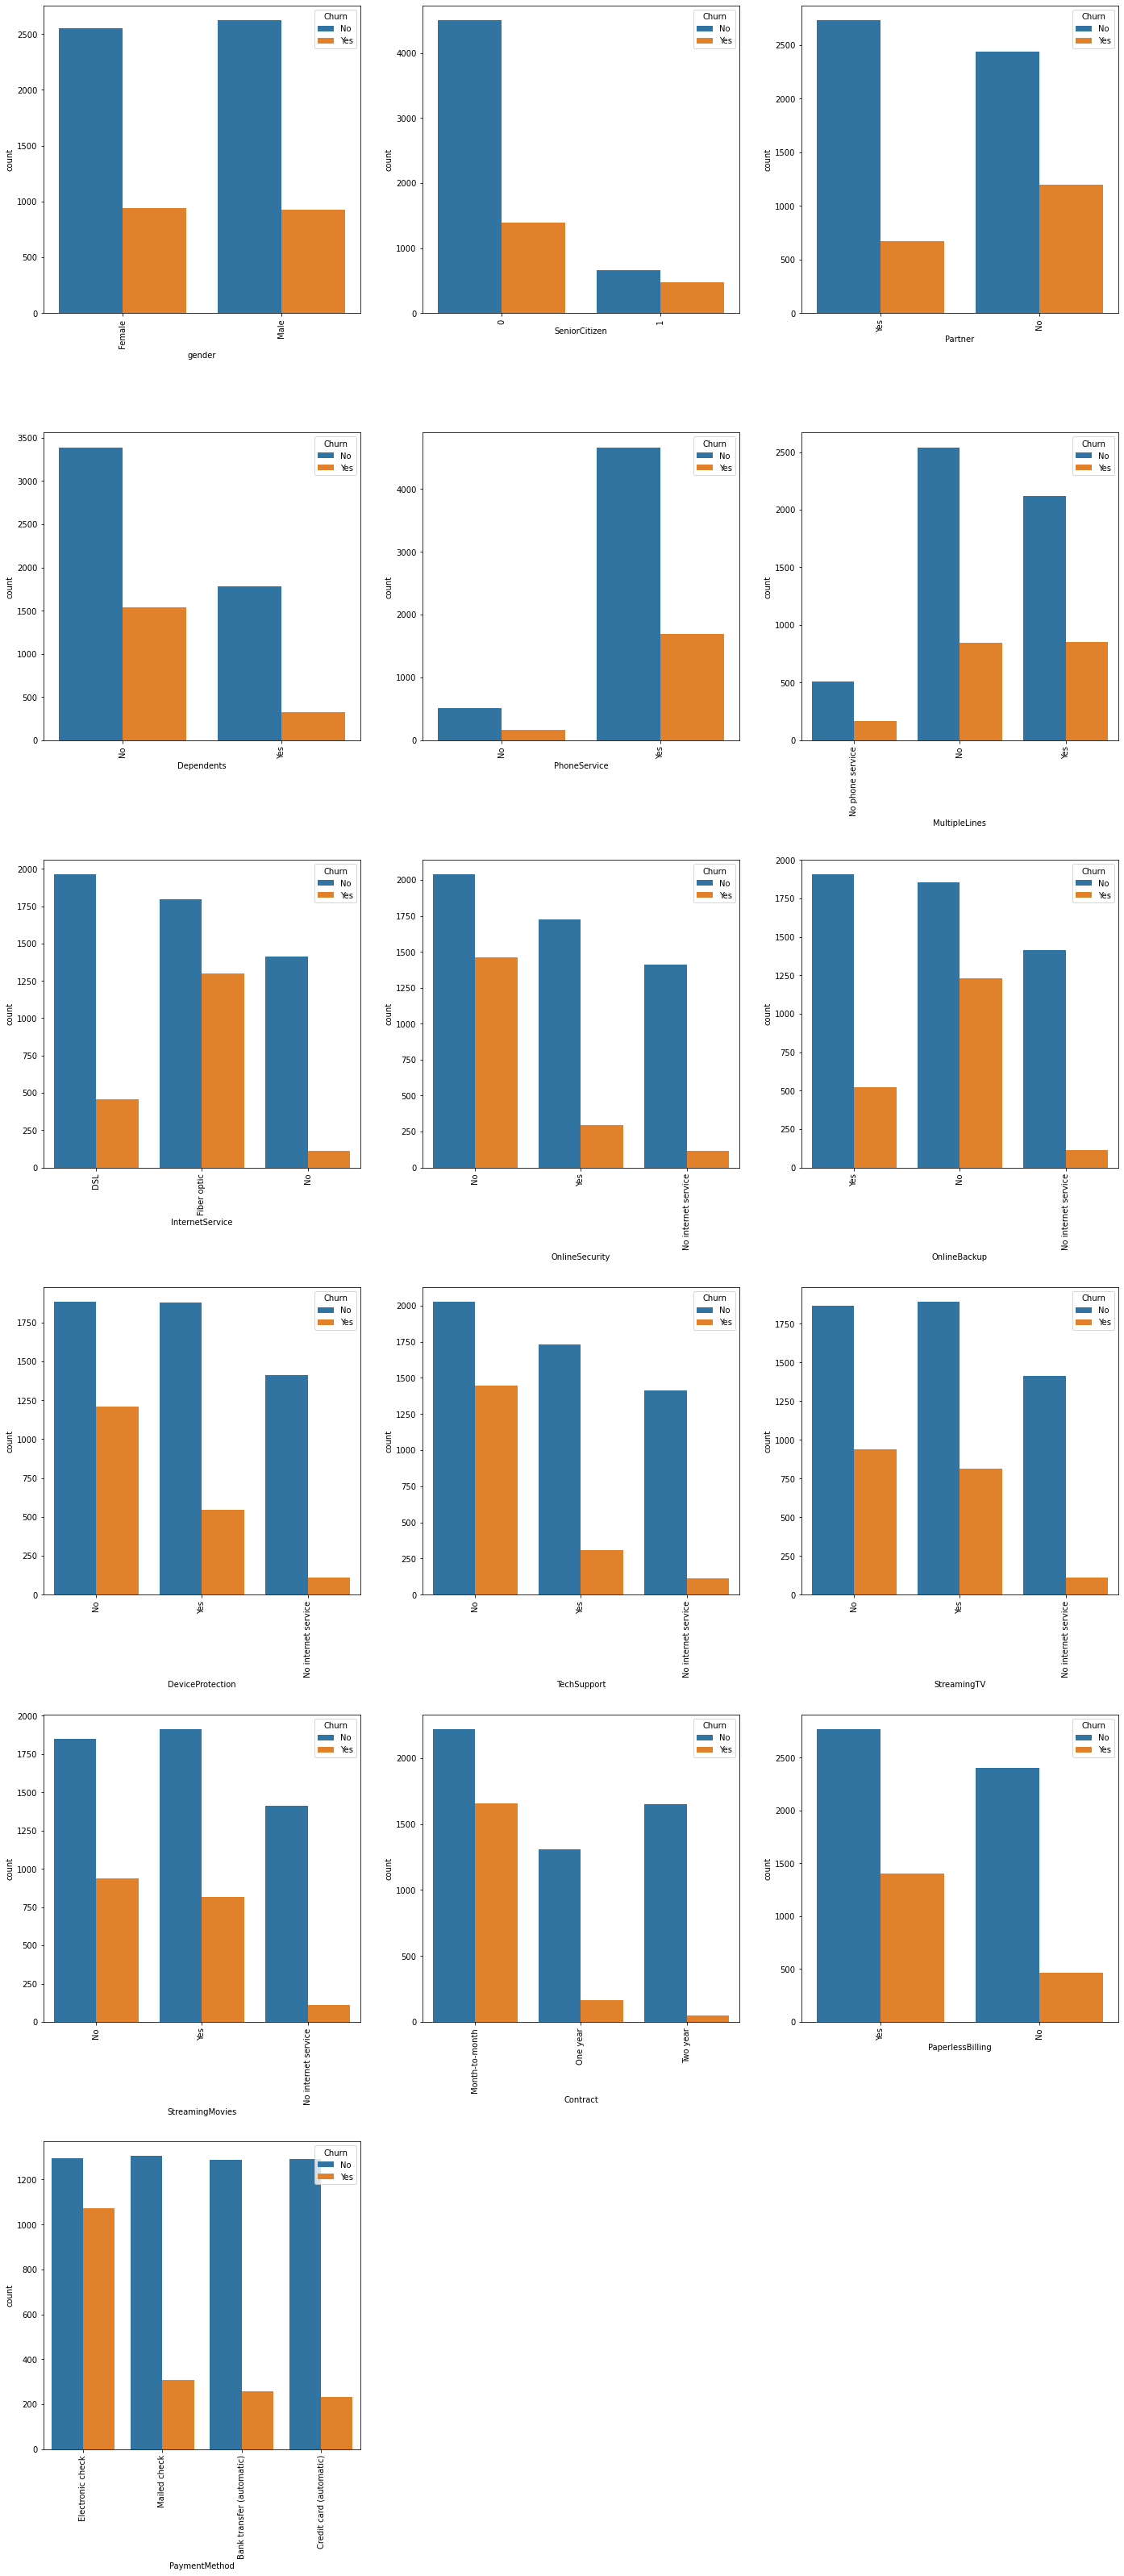

In [540]:
#Plotting the categorical data with churn

c = 1
plt.figure(figsize=(20,45))

for i in categories:
    plt.subplot(6,3,c)
    sns.countplot(data[i], hue = data.Churn)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()
    

### Observation 

The churn column is impacted majorly by the below mentioned categories -

- Senior citizen - In case you are a senior citizen, chances of churn are higher
- Partner - In case you dont have a partner, chances of churn are high
- Dependents - In case you have no dependents, chances of churn are high
- Internet service - Chances of churn are higher in case you have internet service as fiber optics.
- Online security - Chances of churn are higher where internet security is not available. People with no internet connection are less prone to churn.
- Online backup - Chances of churn are higher where online backup is set to No. People with no internet connection are less prone to churn.
- Device protection  - Chances of churn are higher in case device protection is not available. People with no internet connection are less prone to churn.
- Tech support - Chances of churn are higher in case tech support is unavailable.People with no internet connection are less prone to churn.
- Streaming TV and movies - Churn is almost equal in case people stream TV and movies and dont stream. People with no internet connection are less prone to churn.
- Contract - In case people have month-to-month contract, chances of churn are higher.
- Paperless billing - People who use paperless billing are more prone to churn
- Payment method - People paying using electronic check are more prone to churn.

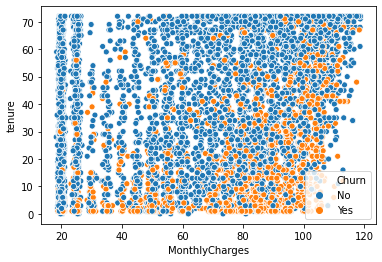

In [541]:
### Checking numerical columns with churn

sns.scatterplot(x = data.MonthlyCharges,  y = data.tenure, hue = data.Churn)

### Observation -

- As the number of months increases (tenure), chances of churn decreases.
- MAx chances of churn are during the initial tenure and when the monthly charges are high.

In [542]:
# We will now plot heatmap to check correlations of data on Churn, we will convert yes and no type data to numeric values

In [543]:
data.replace('Yes', 1, inplace=True)
data.replace('No', 0, inplace=True)
data.replace('No internet service', 2, inplace=True)
data.replace('No phone service', 3, inplace=True)

In [544]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,3,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,3,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,3,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


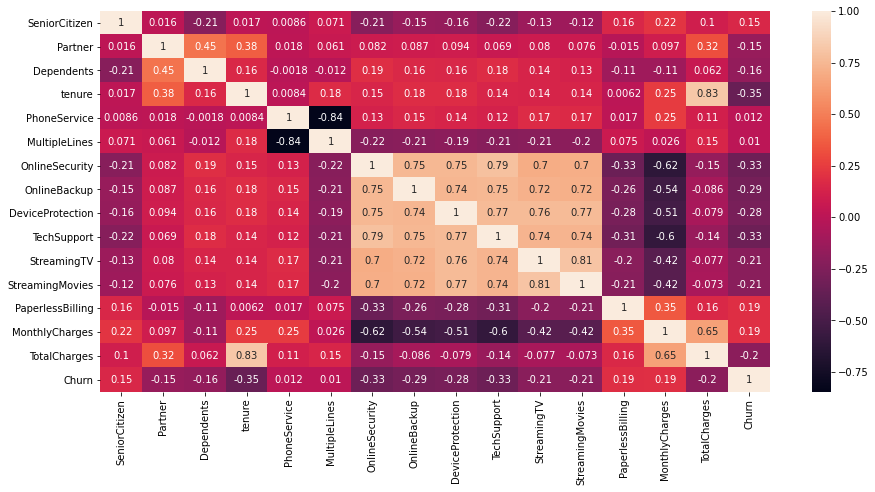

In [545]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot = True)

### Observation -

We observe negative correlations of churn with tenure (35%), online security and tech support (33%), online backup and device protection (28 and 29%).
- Paperless billing and monthly charges have 19% correlation with churn.
- Columns related to internet are internally correlated with ~75% correlations

# Conclusions of the EDA -

From the EDA above -

- We identified which columns actually impact the churn
- Observe the data distributions among various categories
- Identified the relevance of available data

# Data modeling

In [546]:
#Dropping the customer ID column due to presence of unique values

data.drop('customerID', axis = 1, inplace = True)

In [547]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,3,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,3,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,3,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [549]:
#Re-replacing data in Internet service column since we need to encode the data and it will be done on a single datatype only.

data.InternetService.replace(0, 'None', inplace = True)

### Checking outliers

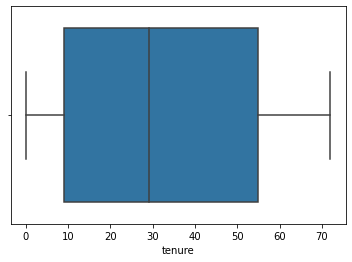

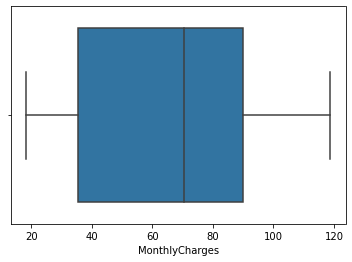

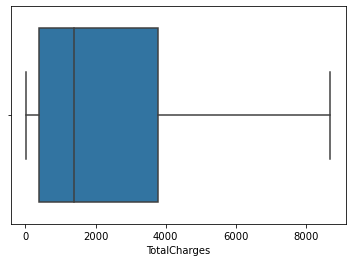

In [550]:
for i in ['tenure','MonthlyCharges','TotalCharges']:
    sns.boxplot(data[i])
    plt.show()

### Observation 

We do not have outliers in our data

## Skewness Treatment 

In [551]:
#Checking skewness in numerical columns

for i in ['tenure','MonthlyCharges','TotalCharges']:
    print(i, data[i].skew())

tenure 0.2395397495619829
MonthlyCharges -0.22052443394398033
TotalCharges 0.9633155974592842


In [552]:
# We need to treat skewness in Total charges column, using squareroot transform here

data['TotalCharges'] = np.sqrt(data['TotalCharges'])

In [553]:
data['TotalCharges'].skew()

0.309873916659052

We have successfully treated the skewness from our data

# Encoding rest of the categorical data

In [554]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [555]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)
        data[i] = le.fit_transform(data[i])

gender
InternetService
Contract
PaymentMethod


In [556]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,3,0,0,1,0,0,0,0,0,1,2,29.85,5.463515,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,43.468379,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,10.399519,1
3,1,0,0,0,45,0,3,0,1,0,1,1,0,0,1,0,0,42.30,42.903963,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,12.314625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,44.615020,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,85.807342,0
7040,0,0,1,1,11,0,3,0,1,0,0,0,0,0,0,1,2,29.60,18.613167,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,17.509997,1


# Scaling the data

In [557]:
#Lets bring all features to a common scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [558]:
ds_x = data.drop('Churn', axis = 1)
y = data['Churn']

In [559]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

In [560]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,2.580501,-1.183234,-0.903589,0.284912,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,0.829798,0.398558,-1.160323,-1.444800
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.803524,-1.183234,0.351386,-0.999747,0.286059,-0.909172,-1.071457,-1.078210,0.371271,-1.205113,1.334863,-0.259629,0.102674
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.803524,-1.183234,0.351386,0.284912,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,0.829798,1.334863,-0.362660,-1.243817
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,2.580501,-1.183234,0.351386,-0.999747,0.286059,0.347362,-1.071457,-1.078210,0.371271,-1.205113,-1.474052,-0.746535,0.079692
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.803524,0.172250,-0.903589,-0.999747,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,0.829798,0.398558,0.197365,-1.165838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,0.324485,-1.183234,0.351386,-0.999747,0.286059,0.347362,0.238887,0.234693,0.371271,0.829798,1.334863,0.665992,0.149362
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,0.324485,0.172250,-0.903589,0.284912,0.286059,-0.909172,0.238887,0.234693,0.371271,0.829798,-0.537747,1.277533,1.826621
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,2.580501,-1.183234,0.351386,-0.999747,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,0.829798,0.398558,-1.168632,-0.909375
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,0.324485,0.172250,-0.903589,-0.999747,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,0.829798,1.334863,0.320338,-0.954294


In [561]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

We have successfully scaled the independent variables

# Fitting the classification models

In [562]:
#Importing necessary models

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [563]:
#Creating instances for classification models

dt = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
lg = LogisticRegression()

In [564]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
for i in [dt, gnb, svc, knn, lg]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = accuracy_score(y_test, pred)
    train_score = accuracy_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.05:
        print(i)
        print('Accuracy score for train data ', accuracy_score(y_test, pred))
        print('Accuracy score for test data', accuracy_score(y_train, i.predict(x_train)))
        print(classification_report(y_test, pred))
        print(confusion_matrix(y_test, pred))
        print('------------------------------------------')

GaussianNB()
Accuracy score for train data  0.7160435399905348
Accuracy score for test data 0.7111561866125761
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      1539
           1       0.49      0.85      0.62       574

    accuracy                           0.72      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.72      0.73      2113

[[1027  512]
 [  88  486]]
------------------------------------------
SVC()
Accuracy score for train data  0.8035967818267865
Accuracy score for test data 0.8107505070993914
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1539
           1       0.70      0.48      0.57       574

    accuracy                           0.80      2113
   macro avg       0.77      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1424  115]
 [ 300  274]]
----------------------------------

### Observation

Logistic regression model provides the best scoring in terms of accuracy, and the precision as well.

The confusion matrix also tells us that the model was able to classify maximum values and the confusion values for LG are lesser.

# Using the ensemble methods

In [565]:
from sklearn.ensemble import RandomForestClassifier

In [566]:
rfc = RandomForestClassifier()

In [567]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,rfc.predict(x_train))
if abs(train_score - test_score) <= 0.5:
    print(rfc, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, rfc.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

RandomForestClassifier() 0.7908187411263606
Accuracy score for train data 0.9983772819472616
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.48      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

[[1397  142]
 [ 300  274]]
-----------------------------------------------------------


In [568]:
from sklearn.ensemble import AdaBoostClassifier

In [569]:
ad = AdaBoostClassifier()

In [570]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
ad.fit(x_train, y_train)
predict = ad.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,ad.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print(ad, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, ad.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

AdaBoostClassifier() 0.8017037387600567
Accuracy score for train data 0.8085192697768763
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

[[1392  147]
 [ 272  302]]
-----------------------------------------------------------


In [571]:
from sklearn.ensemble import GradientBoostingClassifier

In [572]:
gd = GradientBoostingClassifier()

In [573]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
gd.fit(x_train, y_train)
predict = gd.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,gd.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print(gd, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, gd.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

GradientBoostingClassifier() 0.8002839564600095
Accuracy score for train data 0.8269776876267748
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

[[1397  142]
 [ 280  294]]
-----------------------------------------------------------


### Observation 

We see that the Logistic Regression model is able to provide the best scores, hence we will proceed with the Logistic Regression model and further hypertune the model

# Cross validation 

In [574]:
from sklearn.model_selection import cross_val_score

In [575]:
for i in range(2,9):
    cv = cross_val_score(lg, x, y, cv=i)
    print(lg, cv.mean())

LogisticRegression() 0.8027823970430681
LogisticRegression() 0.8047710090351791
LogisticRegression() 0.8049134337411593
LogisticRegression() 0.804771779630944
LogisticRegression() 0.8034936167884926
LogisticRegression() 0.8060485152639278
LogisticRegression() 0.8050544641935816


The model is giving approx 80% accuracy on all folds and is learning well with multiple folds.

# Hyperparameter tuning

In [576]:
from sklearn.model_selection import GridSearchCV

In [577]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [578]:
params = {'C': [0.1,1.0,10],'max_iter': [10,100,50], 'n_jobs': [None,1,2], 'fit_intercept': [True,False] }

In [579]:
gcv = GridSearchCV(lg,params)

In [580]:
res = gcv.fit(x_train,y_train)

In [581]:
res.best_params_

{'C': 1.0, 'fit_intercept': True, 'max_iter': 100, 'n_jobs': None}

In [582]:
res.best_score_


0.8038539553752535

### Observation -

The model has the default params as the best params, hence we will save the model directly without any changes.

# AUC ROC curve

In [583]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = lg.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

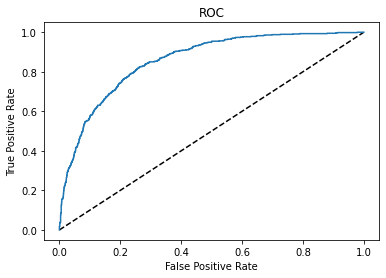

In [584]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# Saving the model

In [585]:
import joblib

In [586]:
joblib.dump(lg,'customer_churn.obj')

['customer_churn.obj']

# Conclusion

We have successfully trained the model to predict 81% of the customer churn correctly.

The model predicts the majority of the values with churn as No, and has certain level of confusion with values where churn can be 1. But the classifying power is better than rest of the machine learning models.

In [587]:
model = joblib.load('customer_churn.obj')
result = model.predict(x_test)
accuracy_score(y_test,result)

0.812588736393753

In [588]:
#Creating a dataframe with actual and predicted values

predicted_values = pd.DataFrame({'Actual':y_test,'Predicted':result})

In [589]:
#Printing the final result

predicted_values

,Actual,Predicted
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
...,...,...
5522,1,1
6377,1,1
5500,0,0
2392,0,1
